In [85]:
import pandas as pd
df = pd.read_csv("train dataset.csv")
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [86]:
#conversion 
# for i in range(df.shape[0]):
#     if df.loc[i,'Gender'] == "Male":
#         df.loc[i,'Gender'] = 1
#     else:
#         df.loc[i,'Gender'] = 0
# df.head()

In [87]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
#Euclidean distance
def euclidean_distance(p1,p2):
    dist = np.sqrt(np.sum((p1 - p2)**2))
    return dist


In [88]:
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split


#Func to calculate knn
def knn_predict(x_train,y,x_input,k):
    op_labels = []
    for item in x_input:
        point_dist = []
        for j in range(len(x_train)):
            distances = euclidean_distance(np.array(x_train[j,:]),item)
            point_dist.append(distances)
            
        point_dist = np.array(point_dist)
      
        #print(point_dist)
        
        dist = np.argsort(point_dist)[:k]
        
        labels = y[dist]
#         print(labels)
        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)
       
    return op_labels  
        

In [89]:
X=df.drop(["Personality","Gender","Age"],axis=1)
y =df.Personality

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=10)

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)



In [91]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score
accuracy = []
for i in range(1,41):
    y_pred= knn_predict(x_train,y_train,x_test,i)
    accuracy.append([i,accuracy_score(y_test,y_pred)])
accuracy    
    

[[1, 0.328125],
 [2, 0.29296875],
 [3, 0.29296875],
 [4, 0.29296875],
 [5, 0.328125],
 [6, 0.3046875],
 [7, 0.3046875],
 [8, 0.32421875],
 [9, 0.3125],
 [10, 0.328125],
 [11, 0.30078125],
 [12, 0.31640625],
 [13, 0.3046875],
 [14, 0.2890625],
 [15, 0.31640625],
 [16, 0.3125],
 [17, 0.328125],
 [18, 0.33984375],
 [19, 0.33203125],
 [20, 0.32421875],
 [21, 0.3203125],
 [22, 0.33984375],
 [23, 0.33984375],
 [24, 0.328125],
 [25, 0.34765625],
 [26, 0.33203125],
 [27, 0.3125],
 [28, 0.3125],
 [29, 0.31640625],
 [30, 0.328125],
 [31, 0.3359375],
 [32, 0.3359375],
 [33, 0.328125],
 [34, 0.3359375],
 [35, 0.3515625],
 [36, 0.3359375],
 [37, 0.34765625],
 [38, 0.33984375],
 [39, 0.3359375],
 [40, 0.34765625]]

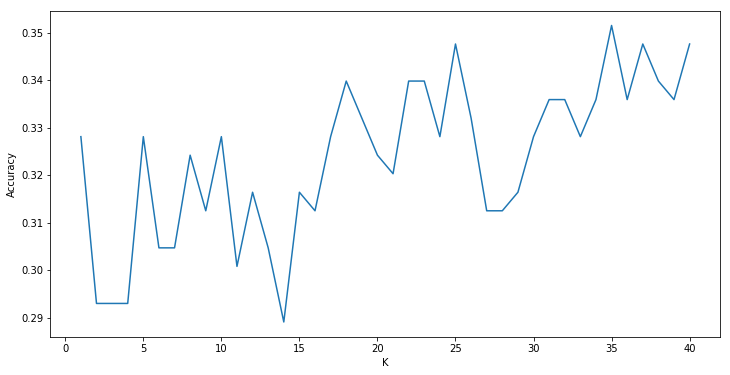

In [93]:
# plt.plot()
import matplotlib.pyplot as plt
x_axis = []
y_axis = []
for item in accuracy:
    x_axis.append(item[0])
    y_axis.append(item[1])
plt.figure(figsize = (12,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(x_axis,y_axis)    